# First, a brute force method, scanning over certain domain to check if there is a change in the function sign at that point.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def function(x):
    return sin(x)
    

In [3]:
width = 0.001 # Smaller step values produce more accurate and precise results
start = -1.0
stop = 7.0

FuncSign = function(start) > 0

x = start
while x <= stop:
    value = function(x)
 
    if value == 0:
        # We hit a root
        print "Zero found at", x
    elif (value > 0) != FuncSign:
        # We passed a root
        print "Zero found near", x
 
    # Update our sign
    FuncSign = value > 0
 
    x += width

Zero found near 8.81239525796e-16
Zero found near 3.142
Zero found near 6.284


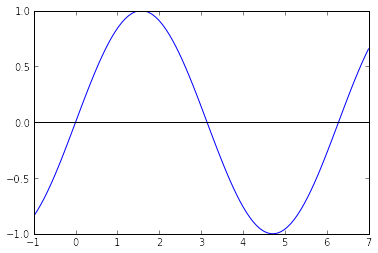

In [4]:
X = np.linspace(start,stop,100)
Y = function(X)
plot(X,Y)
axhline(0,c='k')

# Now we could try the bisection method, halving the search space with every step

In [5]:
def bisection(a,b,tol):
    if function(a)*function(b)>0:
        raise Exception('No change of sign - bisection not possible')      
    c = (a+b)/2.0
    while (b-a)/2.0 > tol:
        if function(c) == 0:
            return c
        elif function(a)*function(c) < 0:
            b = c
        else :
            a = c
        c = (a+b)/2.0

    return c

print bisection(2, 4, 0.00000001)

3.14159265906


# And finally, the Newton-Raphson method

In [6]:
def f_prime(x):
    h=0.0001
    return (function(x+h)-function(x-h))/(2*h)
    
def newt(x,n):
	for i in range(n):
		if f_prime(x) == 0:
			return x
		x = x - function(x)/f_prime(x)
	return x

print newt(2, 10)

3.14159265359
